In [3]:
#importer la librairie yfinance pour télécharger les données financières sur yahoo finance
import yfinance as yf


In [4]:
#Définir les dates avant l'évènement et après l'évènement
start = "2015-12-28"
training_end = "2018-03-05"
treatment_start = "2018-03-12"
end = "2018-07-16"
end_stock = "2018-07-17"

In [5]:
#Charger les données financières
stocks = ["FB", "WMT", "DIS", "BMW.DE", "NVS",
          "GS", "GE", "KHC", "MCD", "CARL-B.CO"]
dataset = yf.download(stocks,
                      start = start,
                      end = end_stock,
                      interval = '1wk')

[*********************100%***********************]  10 of 10 completed


In [6]:
dataset.head()

Adj Close                                                 \
               BMW.DE   CARL-B.CO        DIS          FB          GE   
Date                                                                   
2015-12-28  73.872650  539.871521  99.137009  104.660004  216.278778   
2016-01-04  63.135654  523.565308  93.636742   97.330002  197.532333   
2016-01-11  59.034557  468.476288  88.589325   94.970001  197.810028   
2016-01-18  60.313316  476.409027  91.419640   97.940002  196.074234   
2016-01-25  58.005508  509.462463  90.400734  112.209999  202.045364   

                                                                     ...  \
                    GS        KHC         MCD        NVS        WMT  ...   
Date                                                                 ...   
2015-12-28  163.410629  57.409351  102.049759  62.071339  54.044617  ...   
2016-01-04  148.640839  56.162697   99.752052  58.839363  56.019485  ...   
2016-01-11  141.088196  54.600433   99.492912  57.879868  54.600044  ...   
2016-01-18  142.221542  58.695461  102.274376  59.329929  55.270088  ...   
2016-01-25  146.482956  61.591171  106.921638  56.249447  58.505718  ...   

                Volume                                                  \
                BMW.DE  CARL-B.CO         DIS           FB          GE   
Date                                                                     
2015-12-28   1369610.0   241770.0  29287000.0   61755700.0  18381155.0   
2016-01-04  10993048.0  1100474.0  68050700.0  166842000.0  45171607.0   
2016-01-11  12546620.0  2284226.0  63547000.0  186529800.0  38544428.0   
2016-01-18   9592422.0  2009991.0  54586900.0  151064000.0  36914358.0   
2016-01-25   8558345.0  1989665.0  36581000.0  288273300.0  29255746.0   

                                                                        
                    GS         KHC         MCD         NVS         WMT  
Date                                                                    
2015-12-28   6860400.0  13409700.0  12115100.0   6897438.0  25597100.0  
2016-01-04  24424200.0  19504700.0  36434100.0  13526143.0  86077700.0  
2016-01-11  24590000.0  20863900.0  38424500.0  13919199.0  66684700.0  
2016-01-18  26552300.0  19034000.0  39956200.0  10789041.0  51707100.0  
2016-01-25  24623300.0  21373200.0  48887000.0  18249948.0  60196300.0  

[5 rows x 60 columns]

In [7]:
#Filtrer les données que nous allons utiliser
dataset = dataset.iloc[:, :10]


In [8]:
#Supprimer les noveaux non necessaires
dataset.columns = dataset.columns.droplevel()

In [9]:
#Supprimer les valeurs manquantes
dataset = dataset.dropna()

<AxesSubplot:xlabel='Date'>

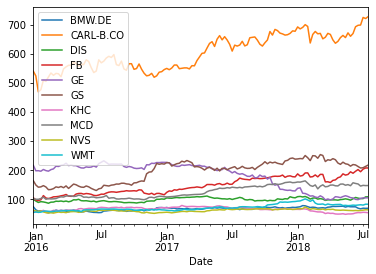

In [10]:
#Visualiser les données
dataset.plot()

<AxesSubplot:>

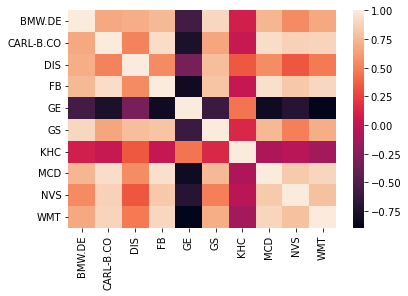

In [11]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

#Sélectionner les données correspondant à la période d'entraînement
dataset_cor = dataset[dataset.index <= treatment_start]

#Matrice de corrélation
sns.heatmap(dataset_cor.corr())


In [12]:
#Sélectionner les données des entreprises les plus corrélées avec celles de Facebook
final_series = dataset[["FB", "CARL-B.CO", "GS", "MCD", "NVS", "WMT"]]

In [13]:
#Définir les variables pre_period et post_period
pre_period = [start, training_end]
post_period = [treatment_start, end]

In [14]:
#Import la classe CausalImpact depuis le module causalimpact
from causalimpact import CausalImpact
impact = CausalImpact(data = final_series,
                      pre_period = pre_period,
                      post_period = post_period,
                      nseasons = [{'period': 52}],
                      prior_level_sd = None)

C:\Users\Brahima Kone\Documents\anaconda3\envs\Causal_inference\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\Users\Brahima Kone\Documents\anaconda3\envs\Causal_inference\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Brahima Kone\Documents\anaconda3\envs\Causal_inference\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


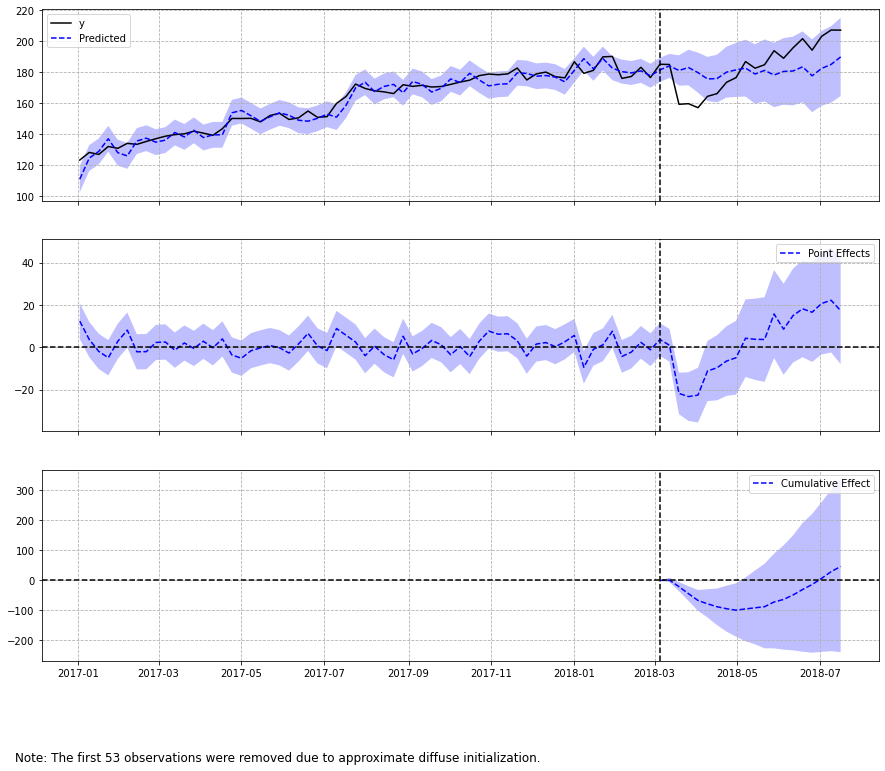

In [15]:
impact.plot()

In [16]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    183.68             3489.84
Prediction (s.d.)         181.24 (7.78)      3443.47 (147.83)
95% CI                    [165.77, 196.27]   [3149.61, 3729.09]

Absolute effect (s.d.)    2.44 (7.78)        46.37 (147.83)
95% CI                    [-12.59, 17.91]    [-239.25, 340.23]

Relative effect (s.d.)    1.35% (4.29%)      1.35% (4.29%)
95% CI                    [-6.95%, 9.88%]    [-6.95%, 9.88%]

Posterior tail-area probability p: 0.36
Posterior prob. of a causal effect: 64.34%

For more details run the command: print(impact.summary('report'))


In [17]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 183.68. In the absence of an
intervention, we would have expected an average response of 181.24.
The 95% interval of this counterfactual prediction is [165.77, 196.27].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 2.44 with a 95% interval of
[-12.59, 17.91]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3489.84.
Had the intervention not taken place, we would have expected
a sum of 3443.47. The 95% interval of this prediction is [3149.61, 3729.09].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an incre